In [143]:
import pandas as pd

In [144]:
names_df = pd.read_csv("../name_dataset/data/IN.csv", names=['first_name','last_name','gender','code'], skiprows=1)

In [145]:
print(names_df.shape)
names_df.info()

(6161590, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161590 entries, 0 to 6161589
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   first_name  object
 1   last_name   object
 2   gender      object
 3   code        object
dtypes: object(4)
memory usage: 188.0+ MB


In [146]:
names_df.head()

,first_name,last_name,gender,code
0,Kapil Kumar,Kapil Kumar,M,IN
1,Mitali,Aggarwal,F,IN
2,Vikas,Jangra,NaN,IN
3,Ravi,Lungay,M,IN
4,Jagat Yadav,Yadav,M,IN


In [147]:
all_names = names_df['first_name'].to_list()
len(all_names)

6161590

In [148]:
# keeping one word name and length of name within 10
import re
words = [name.lower() for name in all_names \
                            if type(name) == str \
                                and len(name) <=10 \
                                and re.match(r'^[a-zA-Z]+$', name) \
                                and len(name.split())==1]
len(words)

5217949

In [149]:
# choosing random 5 lakh names
import random
words = random.sample(words, 500000)


In [150]:
words[500:506]

['sheikh', 'lov', 'vishal', 'rahul', 'ishant', 'mahesh']

In [151]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [152]:
sorted(b.items(), key=lambda k: -k[1])

[(('a', 'n'), 112580),
 (('s', 'h'), 103905),
 (('<S>', 's'), 93956),
 (('r', 'a'), 88960),
 (('a', '<E>'), 81886),
 (('h', 'a'), 67718),
 (('<S>', 'a'), 62700),
 (('a', 'r'), 58280),
 (('h', '<E>'), 58217),
 (('<S>', 'r'), 56592),
 (('n', '<E>'), 49594),
 (('<S>', 'm'), 46517),
 (('m', 'a'), 45253),
 (('i', '<E>'), 42487),
 (('a', 'm'), 41456),
 (('s', 'a'), 41282),
 (('l', '<E>'), 37761),
 (('n', 'a'), 35878),
 (('<S>', 'p'), 35298),
 (('h', 'i'), 33735),
 (('e', 's'), 32921),
 (('a', 'j'), 32413),
 (('r', '<E>'), 32383),
 (('u', '<E>'), 32258),
 (('i', 't'), 31485),
 (('a', 'l'), 31469),
 (('a', 's'), 31117),
 (('i', 'n'), 30934),
 (('k', 'a'), 30775),
 (('j', 'a'), 28777),
 (('n', 'i'), 28598),
 (('e', 'e'), 28578),
 (('v', 'i'), 26197),
 (('<S>', 'k'), 26143),
 (('t', '<E>'), 25296),
 (('n', 'd'), 24782),
 (('r', 'i'), 24143),
 (('<S>', 'd'), 23431),
 (('s', 'u'), 22887),
 (('p', 'a'), 22736),
 (('i', 's'), 22695),
 (('<S>', 'b'), 22611),
 (('y', 'a'), 22427),
 (('t', 'a'), 22159)

In [153]:
chars = sorted(list(set("".join(words))))

In [154]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [155]:
import torch

In [156]:
# creating 27 * 27 matrix
N = torch.zeros((27, 27), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        N[i1, i2] += 1

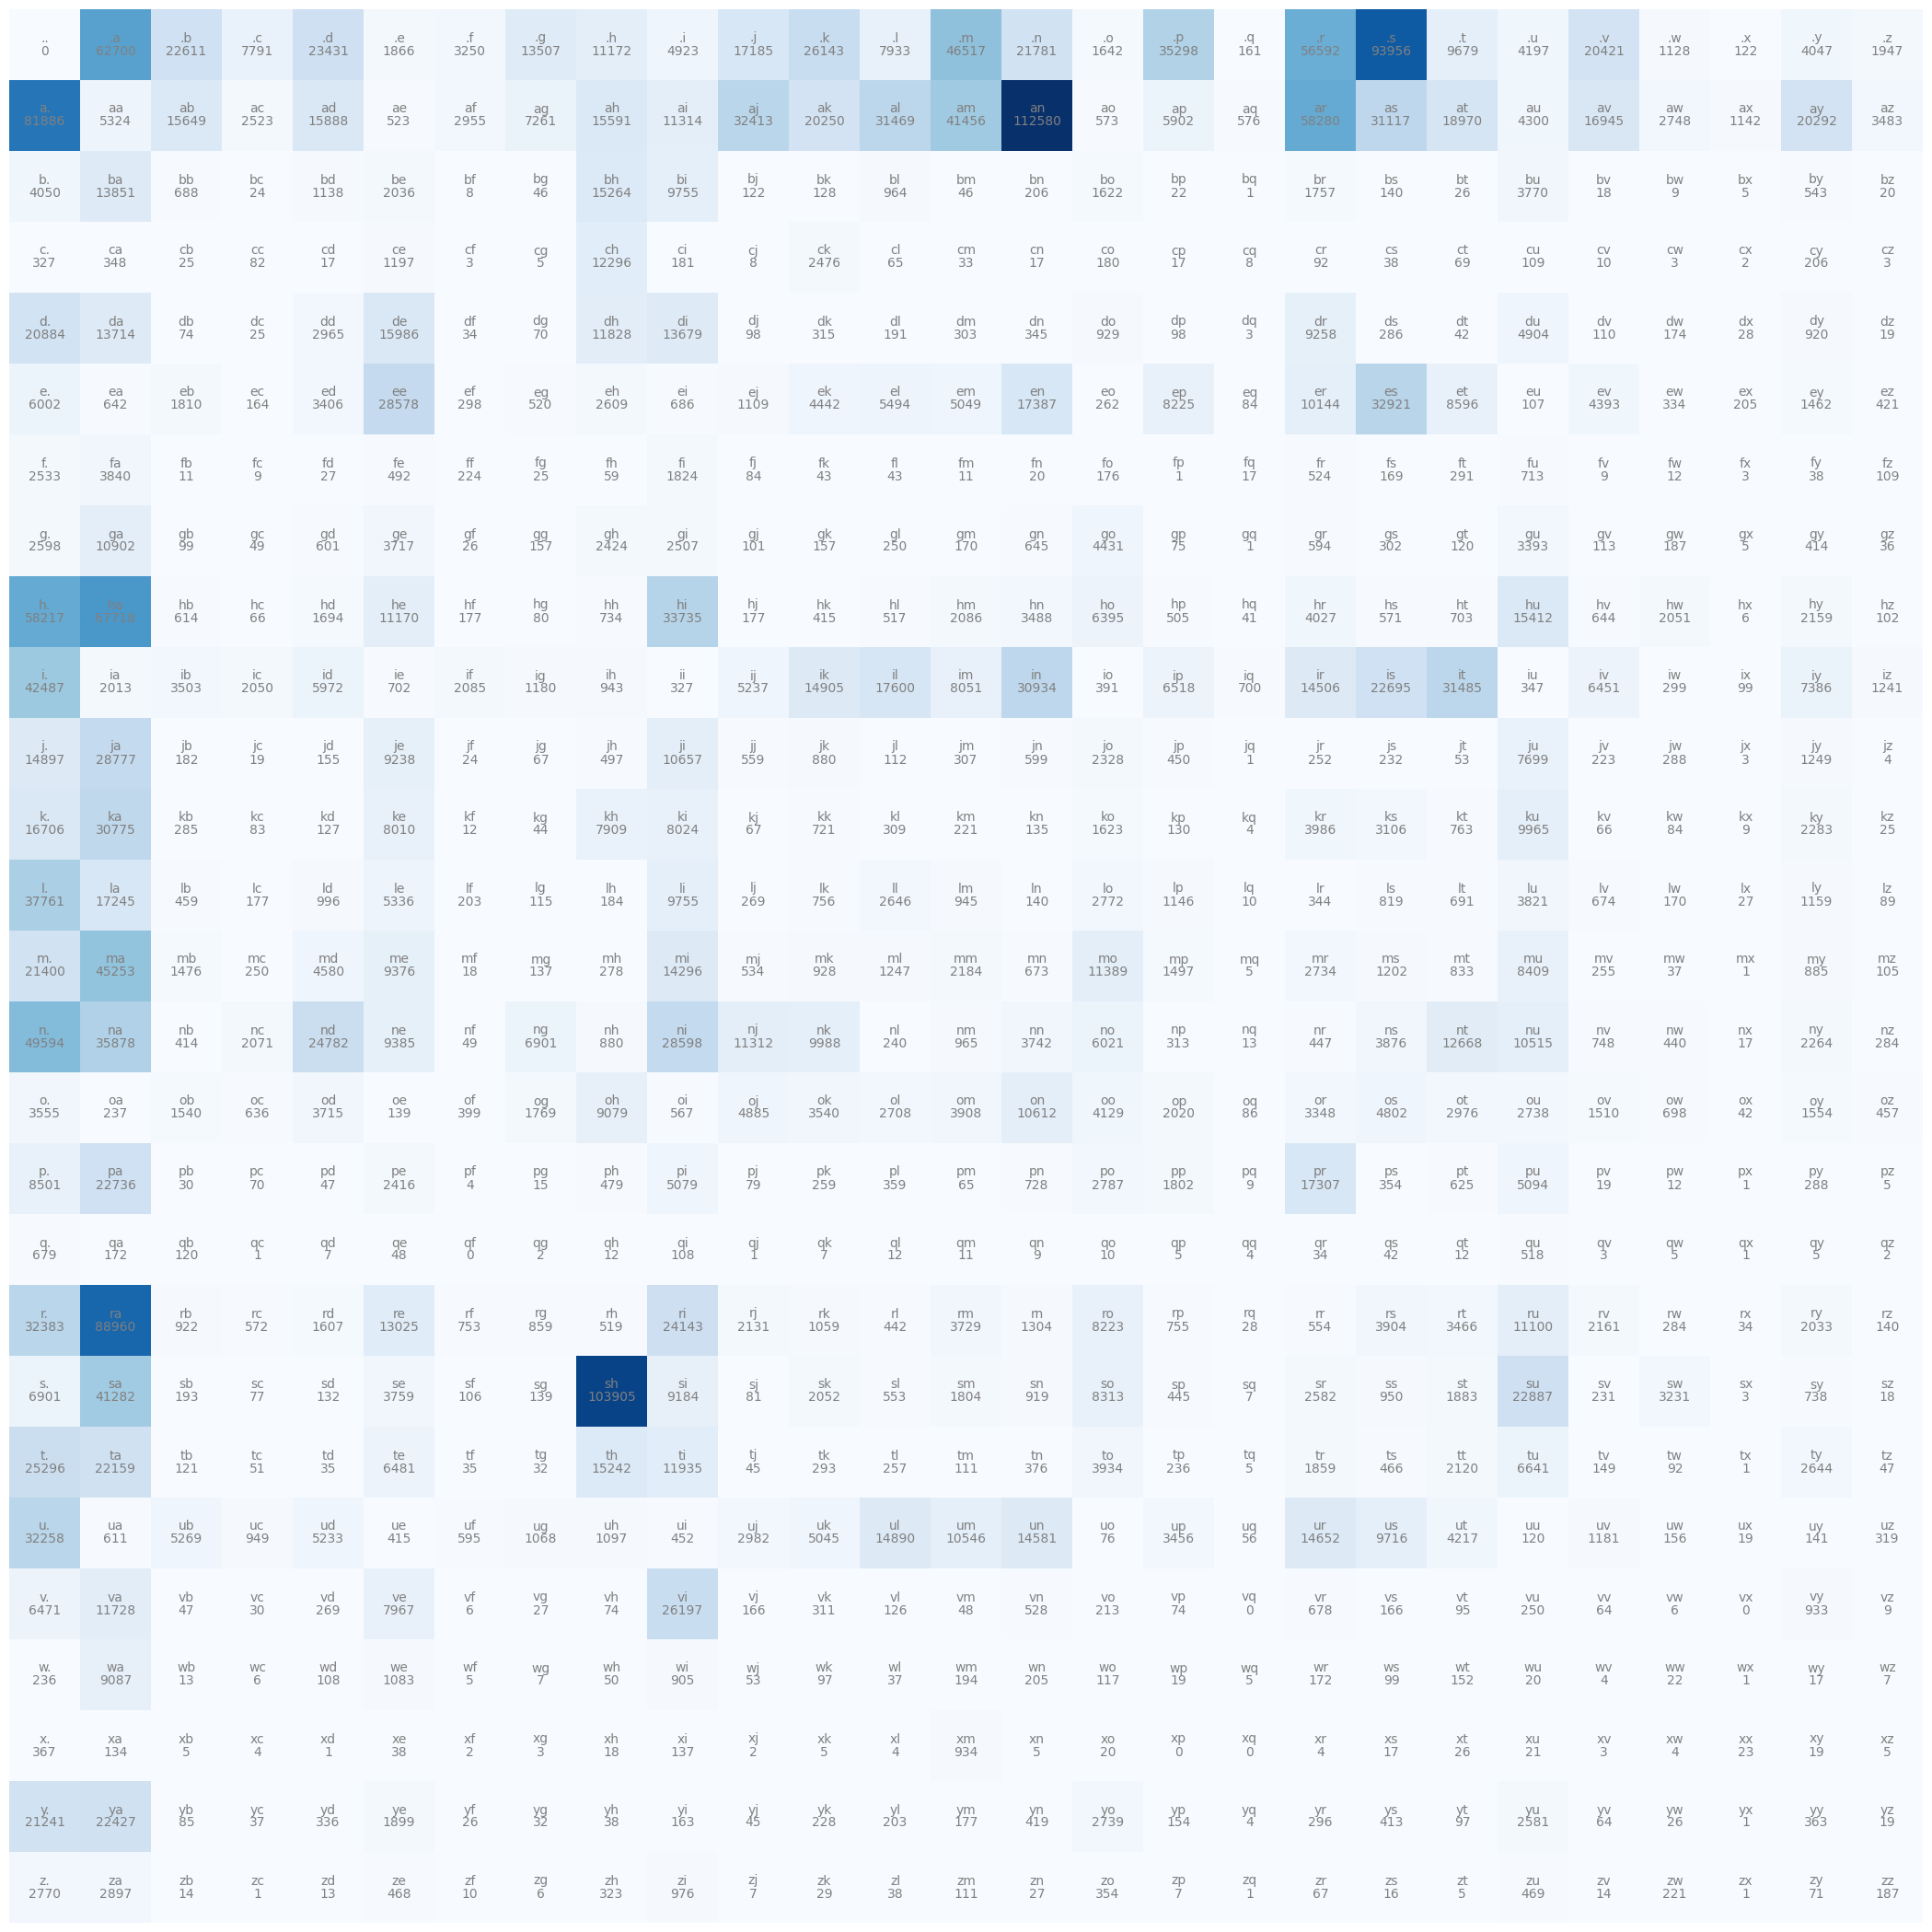

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(27, 27))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [158]:
# distribution 
g = torch.Generator().manual_seed(2173848945545454)
p = torch.rand(3, generator=g)
p = p / p.sum()
torch.multinomial(p, num_samples=30, replacement=True, generator=g)

tensor([0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2,
        2, 2, 1, 1, 1, 1])

In [159]:
N[0]

tensor([    0, 62700, 22611,  7791, 23431,  1866,  3250, 13507, 11172,  4923,
        17185, 26143,  7933, 46517, 21781,  1642, 35298,   161, 56592, 93956,
         9679,  4197, 20421,  1128,   122,  4047,  1947], dtype=torch.int32)

In [160]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1254, 0.0452, 0.0156, 0.0469, 0.0037, 0.0065, 0.0270, 0.0223,
        0.0098, 0.0344, 0.0523, 0.0159, 0.0930, 0.0436, 0.0033, 0.0706, 0.0003,
        0.1132, 0.1879, 0.0194, 0.0084, 0.0408, 0.0023, 0.0002, 0.0081, 0.0039])

In [161]:
g = torch.Generator().manual_seed(2173848945545454)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'r'

In [162]:
P = N.float()

In [163]:
P.shape

torch.Size([27, 27])

In [164]:
# probability matrix for N
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [165]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [166]:
# name generator
g = torch.Generator().manual_seed(54654655)

for i in range(20):

    name = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name.append(itos[ix])
        if ix == 0:
            break
    print(''.join(name))

sura.
kan.
reja.
meskandi.
mackshu.
bh.
sahalberanur.
hash.
ponsarayal.
odharam.
shupulatenaisashay.
nj.
shishurashanseraj.
shi.
monaleesasan.
rayan.
amare.
kalt.
avinjiluntalbajujy.
sasin.


In [170]:
# loss calculation
log_likelihood = 0.0
n = 0

for w in ['satya']:
    chs = chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        probability = P[i1, i2]
        log_probability = torch.log(probability)
        log_likelihood += log_probability
        n += 1
        print(f'{ch1, ch2}: {probability:.4f} {log_probability:.4f}')

print(f'{log_likelihood=}')
negative_log_likelihood = -log_likelihood
print(f'{negative_log_likelihood=}')
print(f'{negative_log_likelihood/n}')

('.', 's'): 0.1879 -1.6718
('s', 'a'): 0.1944 -1.6379
('a', 't'): 0.0338 -3.3876
('t', 'y'): 0.0263 -3.6395
('y', 'a'): 0.4144 -0.8808
('a', '.'): 0.1459 -1.9251
log_likelihood=tensor(-13.1427)
negative_log_likelihood=tensor(13.1427)
2.190453052520752
